In [54]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import os
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [109]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [110]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [28]:
# Import the datetime module from the datetime library.
from datetime import datetime


In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | vao
Processing Record 3 of Set 1 | eureka
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | sioux lookout
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | ponta delgada
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | dongying
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | yar-sale
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | pemangkat
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | ca mau
Processing Record 19 of Set 1 | yulara
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | nyurba
Processing Record 22 of Set 1 | port elizabeth
Processing Record 23 of Set 1 | albany


City not found. Skipping...
Processing Record 41 of Set 4 | laguna
Processing Record 42 of Set 4 | vila franca do campo
Processing Record 43 of Set 4 | sinazongwe
Processing Record 44 of Set 4 | belyy yar
Processing Record 45 of Set 4 | ilhabela
Processing Record 46 of Set 4 | altay
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | puerto madryn
Processing Record 49 of Set 4 | miracema do tocantins
Processing Record 50 of Set 4 | gat
Processing Record 1 of Set 5 | tuatapere
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | cadillac
Processing Record 5 of Set 5 | puerto carreno
Processing Record 6 of Set 5 | duyun
Processing Record 7 of Set 5 | halalo
City not found. Skipping...
Processing Record 8 of Set 5 | pailon
Processing Record 9 of Set 5 | tingo maria
Processing Record 10 of Set 5 | saint-michel-des-saints
Processing Record 11 of Set 5 | hay river
Processing Record 12 of Set 5 | vanimo
Processing Record

Processing Record 31 of Set 8 | toliary
City not found. Skipping...
Processing Record 32 of Set 8 | thilogne
City not found. Skipping...
Processing Record 33 of Set 8 | mnogovershinnyy
Processing Record 34 of Set 8 | tiksi
Processing Record 35 of Set 8 | lincoln
Processing Record 36 of Set 8 | matara
Processing Record 37 of Set 8 | saint-augustin
Processing Record 38 of Set 8 | coihaique
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | lamar
Processing Record 41 of Set 8 | ranot
Processing Record 42 of Set 8 | terrace
Processing Record 43 of Set 8 | flinders
Processing Record 44 of Set 8 | guaymas
Processing Record 45 of Set 8 | san isidro
Processing Record 46 of Set 8 | smithfield
Processing Record 47 of Set 8 | pampa
Processing Record 48 of Set 8 | kommunar
Processing Record 49 of Set 8 | dharmanagar
Processing Record 50 of Set 8 | riyadh
Processing Record 1 of Set 9 | huron
Processing Record 2 of Set 9 | linshu
City not found. Skipping...
Processing Record 3 o

Processing Record 20 of Set 12 | mutsu
Processing Record 21 of Set 12 | nadapuram
Processing Record 22 of Set 12 | szigetcsep
Processing Record 23 of Set 12 | caohai
Processing Record 24 of Set 12 | bonthe
Processing Record 25 of Set 12 | college
Processing Record 26 of Set 12 | muros
Processing Record 27 of Set 12 | cluses
Processing Record 28 of Set 12 | biak
Processing Record 29 of Set 12 | los llanos de aridane
Processing Record 30 of Set 12 | dingtao
Processing Record 31 of Set 12 | karratha
Processing Record 32 of Set 12 | calamar
Processing Record 33 of Set 12 | ertil
Processing Record 34 of Set 12 | port moresby
Processing Record 35 of Set 12 | bensonville
Processing Record 36 of Set 12 | daud khel
Processing Record 37 of Set 12 | santa cruz de tenerife
Processing Record 38 of Set 12 | san severino marche
Processing Record 39 of Set 12 | dabakala
Processing Record 40 of Set 12 | barahona
Processing Record 41 of Set 12 | pochutla
Processing Record 42 of Set 12 | clyde
Processing

In [33]:
len(city_data)

569

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.73,-155.09,73.99,83,90,3.36,US,2020-02-19 19:02:59
1,Vao,-22.67,167.48,78.03,78,0,12.21,NC,2020-02-19 19:03:08
2,Eureka,40.80,-124.16,53.01,66,1,1.63,US,2020-02-19 19:03:08
3,Kavaratti,10.57,72.64,81.90,63,0,3.60,IN,2020-02-19 19:03:08
4,Mataura,-46.19,168.86,50.00,93,96,1.01,NZ,2020-02-19 19:03:08
5,Sioux Lookout,50.10,-91.92,-2.20,53,40,8.05,CA,2020-02-19 19:03:08
6,Iqaluit,63.75,-68.51,-25.01,60,40,4.70,CA,2020-02-19 19:03:09
7,Ponta Delgada,37.73,-25.67,60.80,100,75,11.41,PT,2020-02-19 19:03:09
8,Rikitea,-23.12,-134.97,78.80,79,5,15.10,PF,2020-02-19 19:03:09
9,Dongying,37.46,118.49,41.50,58,0,4.25,CN,2020-02-19 19:03:09


In [35]:
#change the order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2020-02-19 19:02:59,19.73,-155.09,73.99,83,90,3.36
1,Vao,NC,2020-02-19 19:03:08,-22.67,167.48,78.03,78,0,12.21
2,Eureka,US,2020-02-19 19:03:08,40.80,-124.16,53.01,66,1,1.63
3,Kavaratti,IN,2020-02-19 19:03:08,10.57,72.64,81.90,63,0,3.60
4,Mataura,NZ,2020-02-19 19:03:08,-46.19,168.86,50.00,93,96,1.01
...,...,...,...,...,...,...,...,...,...
564,Cacota,CO,2020-02-19 19:05:11,7.27,-72.64,89.60,49,40,4.70
565,Isabela,PH,2020-02-19 19:05:11,6.71,121.97,77.00,83,40,3.00
566,Tres Picos,MX,2020-02-19 19:05:11,15.87,-93.53,91.31,30,0,2.95
567,Kutum,SD,2020-02-19 19:05:11,14.20,24.67,66.70,27,0,6.26


In [37]:
# Create the output file (CSV).
output_data_file = os.path.join("weather_data","cities.csv")
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [40]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime('%x')
today

'02/19/20'

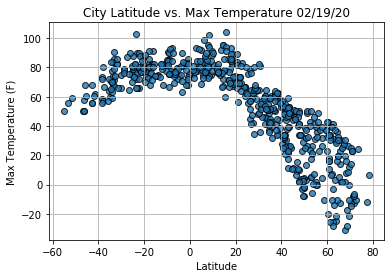

In [46]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

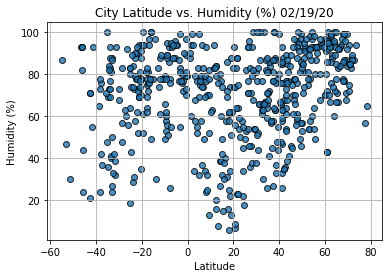

In [48]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

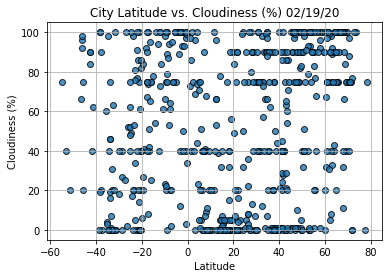

In [49]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

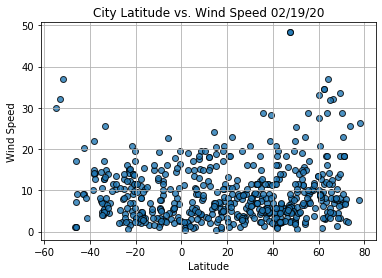

In [47]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [104]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"r value = {r_value:.3f}")


In [102]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

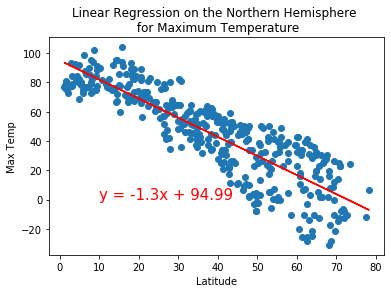

r value = -0.862


In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature'
                       , 'Max Temp',(10,0))

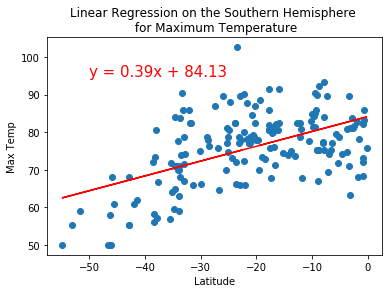

r value = 0.533


In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'
                       ,'Max Temp',(-50,95))

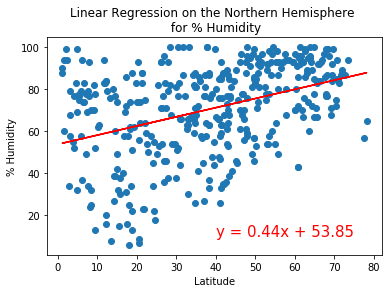

r value = 0.396


In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


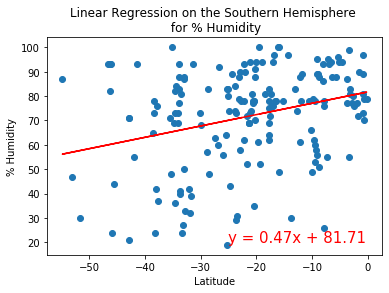

r value = 0.301


In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,20))


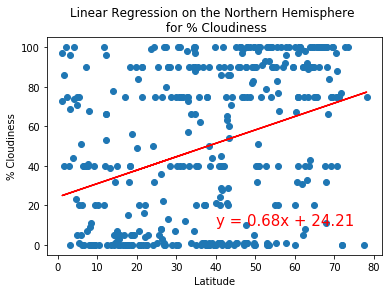

r value = 0.347


In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

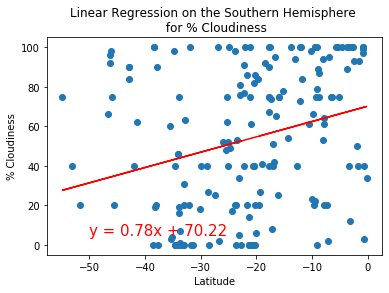

r value = 0.277


In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,5))

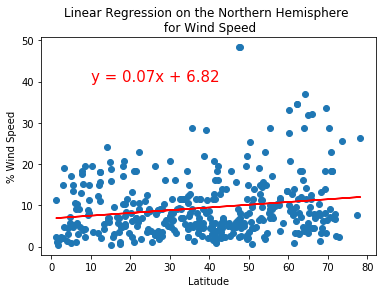

r value = 0.179


In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', '% Wind Speed',(10,40))


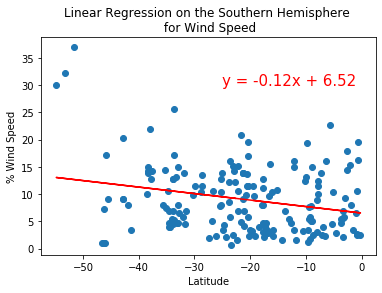

r value = -0.247


In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', '% Wind Speed',(-25,30))